# Lead Scoring Case Study

## Group Members:
####               Sanket bhoir
####               Tanvi Tikmany
####               Reetesh Kiran

## ===================================================================

# Data Preparation:

### Importing libraries and data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Data analysis,excel reading and visualization related packages
import numpy as np
import pandas as pd
#Importing the sklearn package
from sklearn.model_selection import train_test_split
#Importing Scaler
from sklearn.preprocessing import StandardScaler
#Importing visualization pacakages
import matplotlib.pyplot as plt
import seaborn as sns

#Import metrics package from sklearn
from sklearn import metrics
#Importing Logistic regression model 
from sklearn.linear_model import LogisticRegression
# Importing package to run Training Model
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Import RFE
from sklearn.feature_selection import RFE
#Import precision and recall score packages
from sklearn.metrics import precision_score, recall_score
#Import recall curve package
from sklearn.metrics import precision_recall_curve

In [4]:
# Importing the leads datasets
lead_data = pd.read_csv("Leads.csv")

## Inspecting the data: 

In [5]:
# Data Analysis - Reviewing given dataframe understand the each columns
lead_data.head(25)

Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
5   2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7   20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8   cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9   af465dfc-7204-4130-9e05-33231863c4b5       660616   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14  a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16  3abb7c77-1634-4083-9a9f-861068220611       660540   
17  e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534   
18  82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522   
19  4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509   
20  c4419c99-b002-408b-a6fd-fa100716592c       660479   
21  fd71ab5b-53b8-4105-9960-efedc44962fa       660478   
22  8fd38b83-5c32-4277-bcfb-499f34a01c56       660471   
23  ecbc6e69-29a9-44bf-804a-13079ef301bc       660461   
24  ecd117ca-375f-49ea-afd6-b52b84d00c69       660458   

                Lead Origin     Lead Source Do Not Email Do Not Call  \
0                       API      Olark Chat           No          No   
1                       API  Organic Search           No          No   
2   Landing Page Submission  Direct Traffic           No          No   
3   Landing Page Submission  Direct Traffic           No          No   
4   Landing Page Submission          Google           No          No   
5                       API      Olark Chat           No          No   
6   Landing Page Submission          Google           No          No   
7                       API      Olark Chat           No          No   
8   Landing Page Submission  Direct Traffic           No          No   
9                       API          Google           No          No   
10  Landing Page Submission  Organic Search           No          No   
11  Landing Page Submission  Direct Traffic           No          No   
12                      API  Organic Search           No          No   
13  Landing Page Submission  Organic Search           No          No   
14  Landing Page Submission  Direct Traffic          Yes          No   
15                      API  Organic Search           No          No   
16                      API      Olark Chat           No          No   
17                      API  Referral Sites           No          No   
18  Landing Page Submission          Google           No          No   
19                      API  Organic Search           No          No   
20  Landing Page Submission          Google           No          No   
21                      API          Google           No          No   
22  Landing Page Submission          Google           No          No   
23  Landing Page Submission          Google           No          No   
24                      API          Google           No          No   

    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0           0          0.0                            0                  0.00   
1           0          5.0                          674                  2.50   
2           1          2.0                         1532                  2.00   
3           0          1.0                          305                  1.00   
4           1          2.0                         1428                  1.00   
5           0          0.0                            0                  0.00   
6           1          2.0                         1640                  2.00   
7           0          0.

In [6]:
# Data Analysis - Review the shape of the dataframe.
lead_data.shape
# We can see that there are 9240 rows and 37 columns in the original dataframe.

(9240, 37)

In [7]:
# Data Analysis - Describing the data to understand the range
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# Data Analysis - Review the column types 
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Data Analysis - Reviewing the data frame for null values
lead_data.isnull().values.any()
# tells us whether there is presence of null values


True

In [10]:
# Data Analysis - Understanding null values by columns
lead_data.isnull().sum()
#We can see significant number of null values. Data correction steps are required before we start building the model.

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
# Data Analysis - Understanding the percentage of null data.

lead_data.isnull().sum()*100/lead_data.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Dropping columns that are not useful.


In [12]:
#Let us list all columns for reference before proceeding with data prep
df_lead=lead_data
df_lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# Data Analysis - Understanding column wise data to see if the not null values if they make valid sense

lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [14]:
lead_data['Specialization'].unique()
# Select and nan values needs to be aligned. 

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [15]:

lead_data['How did you hear about X Education'].unique()
# Select and nan values needs to be aligned. 

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [16]:
lead_data['What matters most to you in choosing a course'].unique()
# nan values needs to be aligned. 

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [17]:
lead_data['Magazine'].unique()
# as it has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [18]:
lead_data['Receive More Updates About Our Courses'].unique()
# as it has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [19]:
lead_data['Update me on Supply Chain Content'].unique()
# as it has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [20]:
lead_data['Get updates on DM Content'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [21]:
lead_data['I agree to pay the amount through cheque'].unique()
# Has only No values, doesn't make any sense to keep this column, can be dropped.

array(['No'], dtype=object)

In [22]:
lead_data['Lead Quality'].unique()
# nan values needs to be aligned. 

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [23]:
lead_data['Lead Profile'].unique()
# Select & nan values needs to be aligned. 

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [24]:
lead_data['Country'].unique()
# nan values needs to be aligned. 

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [25]:
lead_data['City'].unique()
# Select & nan values needs to be aligned. could also replace them with 'Other Cities'

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [26]:
lead_data['Asymmetrique Activity Score'].unique()
# nan values needs to be aligned, through replacing mean values. Similarly Asymmetrique Profile Score can also be treated

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [27]:
lead_data['Prospect ID'].unique()
#These values doesn't make any sense, column can be dropped

array(['7927b2df-8bba-4d29-b9a2-b6e0beafe620',
       '2a272436-5132-4136-86fa-dcc88c88f482',
       '8cc8c611-a219-4f35-ad23-fdfd2656bd8a', ...,
       'aac550fe-a586-452d-8d3c-f1b62c94e02c',
       '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9',
       '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'], dtype=object)

In [28]:
lead_data['Tags'].unique()
#These values doesn't make any sense, column can be dropped

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [29]:
lead_data['Asymmetrique Activity Index'].unique()
#These values doesn't make any sense, column can be dropped

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [30]:
lead_data['Asymmetrique Profile Index'].unique()
#These values doesn't make any sense, column can be dropped

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

## dropping the unnecessary columns.


In [31]:
#As reviewed earlier, dropping unnecessry columns
dropcols=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df_lead.drop(dropcols, axis=1, inplace=True)
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [32]:
# List of Columns with 'Blank' and 'Select'

df_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance          Select   
1                              Ringing               NaN          Select   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure          Select   
4  Will revert after reading the email          Might be          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                  02.Medium   
2  Mumbai                   02.Medium                    01.High   
3  Mumbai                   02.Medium                    01.High   
4  Mumbai                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 32 columns]

In [33]:
# Drop Columns that are not being useful in deciding whether a lead will be converted or not  / Having one Value as 'No' / Having  > 30 % Null values ;

df_lead.drop(['Prospect ID', 'Tags','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1, inplace=True)

In [35]:
# Impute the NULL and 'Select' Data Columns Values..

df_lead.replace('Select', np.nan,inplace = True)
df_lead['Country'].replace(np.nan, 'Unknown',inplace = True)
df_lead['City'].replace([np.nan,'Select'], 'Other Cities',inplace = True)
df_lead['Specialization'].replace([np.nan,'Select'], 'Not Specified',inplace = True)
df_lead['Lead Source'].replace([np.nan,'Select'], 'Unknown',inplace = True)
df_lead['Last Activity'].replace([np.nan,'Select'], 'Unknown',inplace = True)
df_lead['How did you hear about X Education'].replace([np.nan,'Select'], 'Not Specified',inplace = True)
df_lead['TotalVisits'].replace([np.nan,'Select'], '0',inplace = True)
df_lead['Page Views Per Visit'].replace([np.nan,'Select'], '0',inplace = True)
df_lead['What is your current occupation'].replace([np.nan,'Select'], 'Not Disclosed',inplace = True)
df_lead['What matters most to you in choosing a course'].replace([np.nan,'Select'], 'Other',inplace = True)
df_lead['Lead Quality'].replace([np.nan,'Select'], 'Not Sure',inplace = True)
df_lead['Lead Profile'].replace([np.nan,'Select'], 'Other Leads',inplace = True)
df_lead['Country'].replace([np.nan,'Select'], 'Other Cities',inplace = True)
df_lead['Asymmetrique Activity Score'].replace([np.nan,'Select'], round(df_lead["Asymmetrique Activity Score"].mean(),0),inplace = True)
df_lead['Asymmetrique Profile Score'].replace([np.nan,'Select'], round(df_lead["Asymmetrique Profile Score"].mean(),0),inplace = True)

In [36]:
#Reviewing the dataset post treating various columns
df_lead.head()


Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted TotalVisits  Total Time Spent on Website  \
0          No          0         0.0                            0   
1          No          0         5.0                          674   
2          No          1         2.0                         1532   
3          No          0         1.0                          305   
4          No          1         2.0                         1428   

  Page Views Per Visit            Last Activity  ... Newspaper  \
0                  0.0  Page Visited on Website  ...        No   
1                  2.5             Email Opened  ...        No   
2                  2.0             Email Opened  ...        No   
3                  1.0              Unreachable  ...        No   
4                  1.0        Converted to Lead  ...        No   

  Digital Advertisement Through Recommendations      Lead Quality  \
0                    No                      No  Low in Relevance   
1                    No                      No          Not Sure   
2                    No                      No          Might be   
3                    No                      No          Not Sure   
4                    No                      No          Might be   

     Lead Profile          City Asymmetrique Activity Score  \
0     Other Leads  Other Cities                        15.0   
1     Other Leads  Other Cities                        15.0   
2  Potential Lead        Mumbai                        14.0   
3     Other Leads        Mumbai                        13.0   
4     Other Leads        Mumbai                        15.0   

  Asymmetrique Profile Score A free copy of Mastering The Interview  \
0                       15.0                                     No   
1                       15.0                                     No   
2                       20.0                                    Yes   
3                       17.0                                     No   
4                       18.0                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  

[5 rows x 28 columns]

In [37]:
#Reviwing columns for null values after treatment
df_lead.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

### Data preparation- converting binary variable (YES/NO) to 1/0

In [38]:
# List of variables to map 'Yes' as 1 and 'No' as 0.

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead1=df_lead
df_lead1[varlist] = df_lead1[varlist].apply(binary_map)

In [39]:
#Reviewing dataframe after converting logical values to numbers
df_lead1.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted TotalVisits  Total Time Spent on Website  \
0            0          0         0.0                            0   
1            0          0         5.0                          674   
2            0          1         2.0                         1532   
3            0          0         1.0                          305   
4            0          1         2.0                         1428   

  Page Views Per Visit            Last Activity  ... Newspaper  \
0                  0.0  Page Visited on Website  ...         0   
1                  2.5             Email Opened  ...         0   
2                  2.0             Email Opened  ...         0   
3                  1.0              Unreachable  ...         0   
4                  1.0        Converted to Lead  ...         0   

  Digital Advertisement Through Recommendations      Lead Quality  \
0                     0                       0  Low in Relevance   
1                     0                       0          Not Sure   
2                     0                       0          Might be   
3                     0                       0          Not Sure   
4                     0                       0          Might be   

     Lead Profile          City  Asymmetrique Activity Score  \
0     Other Leads  Other Cities                         15.0   
1     Other Leads  Other Cities                         15.0   
2  Potential Lead        Mumbai                         14.0   
3     Other Leads        Mumbai                         13.0   
4     Other Leads        Mumbai                         15.0   

   Asymmetrique Profile Score  A free copy of Mastering The Interview  \
0                        15.0                                       0   
1                        15.0                                       0   
2                        20.0                                       1   
3                        17.0                                       0   
4                        18.0                                       0   

   Last Notable Activity  
0               Modified  
1           Email Opened  
2           Email Opened  
3               Modified  
4               Modified  

[5 rows x 28 columns]

In [40]:
df_lead1.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

## Data Preparation - Create dummy features for the categorical variables with multiple levels.

In [41]:
# Creating a dummy variable for the categorical variables and dropping the least relevant one.
df_lead2=df_lead1

# Creating dummy variables for the variable 'Lead Origin' and drop First
dm1 = pd.get_dummies(df_lead2['Lead Origin'], prefix='LeadOrigin',drop_first=True)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm1], axis=1)


# Creating dummy variables for the variable 'Lead Source'
dm2 = pd.get_dummies(df_lead2['Lead Source'], prefix='LeadSource')
# Dropping LeadSource_Unknown column
dm2 = dm2.drop(['LeadSource_Unknown'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm2], axis=1)

# Creating dummy variables for the variable 'Last Activity'
dm3 = pd.get_dummies(df_lead2['Last Activity'], prefix='LastActivity')
# Dropping 'LastActivity_Unknown column
dm3 = dm3.drop(['LastActivity_Unknown'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm3], axis=1)


# Creating dummy variables for the variable 'Specialization'
dm4 = pd.get_dummies(df_lead2['Specialization'], prefix='Specialization')
# Dropping Specialization_Not Specified column.
dm4 = dm4.drop(['Specialization_Not Specified'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm4], axis=1)


# Creating dummy variables for the variable 'How did you hear about X Education'
dm5 = pd.get_dummies(df_lead2['How did you hear about X Education'], prefix='How did you hear about X Education')
# Dropping 'How did you hear about X Education_Not Specified' column.
dm5 = dm5.drop(['How did you hear about X Education_Not Specified'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm5], axis=1)


# Creating dummy variables for the variable 'What is your current occupation'
dm6 = pd.get_dummies(df_lead2['What is your current occupation'], prefix='What is your current occupation')
# Dropping 'What is your current occupation_Not Disclosed' column.
dm6 = dm6.drop(['What is your current occupation_Not Disclosed'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm6], axis=1)


# Creating dummy variables for the variable 'What is your current occupation'
dm7 = pd.get_dummies(df_lead2['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
# Dropping 'What matters most to you in choosing a course_Other' column.
dm7 = dm7.drop(['What matters most to you in choosing a course_Other'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm7], axis=1)


# Creating dummy variables for the variable 'Lead Quality'
dm8 = pd.get_dummies(df_lead2['Lead Quality'], prefix='LeadQuality')
# Dropping 'Lead Quality_Not Sure' column.
dm8 = dm8.drop(['LeadQuality_Not Sure'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm8], axis=1)


# Creating dummy variables for the variable 'Lead Profile'
dm9 = pd.get_dummies(df_lead2['Lead Profile'], prefix='LeadProfile')
# Dropping 'LeadProfile_Other Leads' column.
dm9 = dm9.drop(['LeadProfile_Other Leads'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm9], axis=1)


# Creating dummy variables for the variable 'Last Notable Activity'
dm10 = pd.get_dummies(df_lead2['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping 'LastNotableActivity_View in browser link Clicked' column.
dm10 = dm10.drop(['LastNotableActivity_View in browser link Clicked'], 1)
#Adding the results to the master dataframe
df_lead2 = pd.concat([df_lead2,dm10], axis=1)

In [42]:
#Reviewing the shape of new data frame post dummy variables and other treatment 
df_lead2.shape

(9240, 128)

In [43]:
#Reviewing the dataframe after the changes
df_lead2.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted TotalVisits  Total Time Spent on Website  \
0            0          0         0.0                            0   
1            0          0         5.0                          674   
2            0          1         2.0                         1532   
3            0          0         1.0                          305   
4            0          1         2.0                         1428   

  Page Views Per Visit            Last Activity  ...  \
0                  0.0  Page Visited on Website  ...   
1                  2.5             Email Opened  ...   
2                  2.0             Email Opened  ...   
3                  1.0              Unreachable  ...   
4                  1.0        Converted to Lead  ...   

  LastNotableActivity_Email Received  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

  LastNotableActivity_Form Submitted on Website  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  LastNotableActivity_Had a Phone Conversation LastNotableActivity_Modified  \
0                                            0                            1   
1                                            0                            0   
2                                            0                            0   
3                                            0                            1   
4                                            0                            1   

  LastNotableActivity_Olark Chat Conversation  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   LastNotableActivity_Page Visited on Website  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Resubscribed to emails  LastNotableActivity_SMS Sent  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  
0                                0                                 0  
1                                0                                 0  
2                                0                                 0  
3                                0                                 0  
4                                0                                 0  

[5 rows x 128 columns]

### Dropping the original variables after creation of dummy variables

In [44]:
# Data Prep - Dropping the origianal features post dummy variable creation

df_lead3=df_lead2

df_lead3 = df_lead3.drop(['Lead Origin', 'Lead Source','Last Activity','Specialization',
                        'How did you hear about X Education',
                        'What is your current occupation',
                        'What matters most to you in choosing a course',
                       'Lead Quality','Lead Profile','Last Notable Activity'], 1)

In [45]:
#after analysis, we can see that we can even drop city and country as their values are not significant
df_lead3 = df_lead3.drop(['Country','City'],1)

In [46]:
#Reviewing the dataframe again
df_lead3.head()
#Data frame is ready for building model.

Lead Number  Do Not Email  Do Not Call  Converted TotalVisits  \
0       660737             0            0          0         0.0   
1       660728             0            0          0         5.0   
2       660727             0            0          1         2.0   
3       660719             0            0          0         1.0   
4       660681             0            0          1         2.0   

   Total Time Spent on Website Page Views Per Visit  Search  \
0                            0                  0.0       0   
1                          674                  2.5       0   
2                         1532                  2.0       0   
3                          305                  1.0       0   
4                         1428                  1.0       0   

   Newspaper Article  X Education Forums  ...  \
0                  0                   0  ...   
1                  0                   0  ...   
2                  0                   0  ...   
3                  0                   0  ...   
4                  0                   0  ...   

   LastNotableActivity_Email Received  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   LastNotableActivity_Form Submitted on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Resubscribed to emails  LastNotableActivity_SMS Sent  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  
0                                0                                 0  
1                                0                                 0  
2                                0                                 0  
3                                0                                 0  
4                                0                                 0  

[5 rows x 116 columns]

In [47]:
# Revewing if there are nulls in the dataframe
df_lead3.isnull().sum()

Lead Number                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
                                              ..
LastNotableActivity_Page Visited on Website    0
LastNotableActivity_Resubscribed to emails     0
LastNotableActivity_SMS Sent                   0
LastNotableActivity_Unreachable                0
LastNotableActivity_Unsubscribed               0
Length: 116, dtype: int64

In [48]:
#Reviewing the shapre of the dataframe to see number of columns 
df_lead3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 116 entries, Lead Number to LastNotableActivity_Unsubscribed
dtypes: float64(2), int64(12), object(2), uint8(100)
memory usage: 2.0+ MB


In [49]:
df_lead3.select_dtypes(include=[np.object]).head()

TotalVisits Page Views Per Visit
0         0.0                  0.0
1         5.0                  2.5
2         2.0                  2.0
3         1.0                  1.0
4         2.0                  1.0

## Checking for outliers.

In [50]:
# Checking for outliers in the continuous variables
num_dflead3 = df_lead3[['Total Time Spent on Website','Page Views Per Visit']]

In [51]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_dflead3.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Total Time Spent on Website
count                  9240.000000
mean                    487.698268
std                     548.021466
min                       0.000000
25%                      12.000000
50%                     248.000000
75%                     936.000000
90%                    1380.000000
95%                    1562.000000
99%                    1840.610000
max                    2272.000000

In [52]:
# Checking the percentage of missing values
round(100*(df_lead3.isnull().sum()/len(df_lead3.index)), 2)

Lead Number                                    0.0
Do Not Email                                   0.0
Do Not Call                                    0.0
Converted                                      0.0
TotalVisits                                    0.0
                                              ... 
LastNotableActivity_Page Visited on Website    0.0
LastNotableActivity_Resubscribed to emails     0.0
LastNotableActivity_SMS Sent                   0.0
LastNotableActivity_Unreachable                0.0
LastNotableActivity_Unsubscribed               0.0
Length: 116, dtype: float64

In [53]:
df_lead3.dtypes

Lead Number                                     int64
Do Not Email                                    int64
Do Not Call                                     int64
Converted                                       int64
TotalVisits                                    object
                                                ...  
LastNotableActivity_Page Visited on Website     uint8
LastNotableActivity_Resubscribed to emails      uint8
LastNotableActivity_SMS Sent                    uint8
LastNotableActivity_Unreachable                 uint8
LastNotableActivity_Unsubscribed                uint8
Length: 116, dtype: object

In [54]:
# Convert Objects Datatypes to Numeric.
df_lead4=df_lead3

df_lead4['Total Time Spent on Website'] = pd.to_numeric(df_lead4['Total Time Spent on Website'],errors='coerce')
df_lead4['TotalVisits'] = pd.to_numeric(df_lead4['TotalVisits'],errors='coerce')
df_lead4['Page Views Per Visit'] = pd.to_numeric(df_lead4['Page Views Per Visit'],errors='coerce')

# Splitting the Data for Train/Test split.


In [55]:
# Putting feature variable to X

X = df_lead4.drop(['Converted','Lead Number'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  ...  LastNotableActivity_Email Received  \
0          0                      0  ...                                   0   
1          0                      0  ...                                   0   
2          0                      0  ...                                   0   
3          0                      0  ...                                   0   
4          0                      0  ...                                   0   

   LastNotableActivity_Form Submitted on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Resubscribed to emails  LastNotableActivity_SMS Sent  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  
0                                0                                 0  
1                                0                                 0  
2                                0                                 0  
3                                0                                 0  
4                                0                                 0  

[5 rows x 114 columns]

In [56]:
# Putting response variable to y
y = df_lead4['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature scaling.

In [58]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0          0.0                    -0.885371   
6795             0            0          4.0                     0.005716   
3516             0            0          5.0                    -0.691418   
8105             0            0          5.0                     1.365219   
3934             0            0          0.0                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.062143       0                  0                   0   
6795             -0.452487       0                  0                   0   
3516              0.083827       0                  0                   0   
8105              1.229797       0                  0                   0   
3934             -1.062143       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
1871          0                      0  ...   
6795          0                      0  ...   
3516          0                      0  ...   
8105          0                      0  ...   
3934          0                      0  ...   

      LastNotableActivity_Email Received  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   0   
3934                                   0   

      LastNotableActivity_Form Submitted on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      LastNotableActivity_Had a Phone Conversation  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      LastNotableActivity_Modified  \
1871                             0   
6795                             0   
3516                             0   
8105                             0   
3934                             1   

      LastNotableActivity_Olark Chat Conversation  \
1871                                            0   
6795                                            0   
3516                                            0   
8105                                            0   
3934                                            0   

      LastNotableActivity_Page Visited on Website  \
1871                                            0   
6795                                            0   
3516                                            0   
8105                                            0   
3934                                            0   

      LastNotableActivity_Resubscribed to emails  \
1871                                           0   
6795                                           0   
3516                                           0   
8105                                           0   
3934                                           0   

      LastNotableActivity_SMS Sent  LastNotableActivity_Unreachable  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             1                                0   
3934                             0                                0   

      LastNotableActivity_Unsubscribed  
1871                                 0  
6795                                 0  
3516                                 0  
8105                                 0  
3934                                 0  

[5 rows x 114 columns]

In [59]:
### Checking the Converted Rate
Converted = (sum(df_lead4['Converted'])/len(df_lead4['Converted'].index))*100
Converted

38.53896103896104

# looking at correlations between variables.

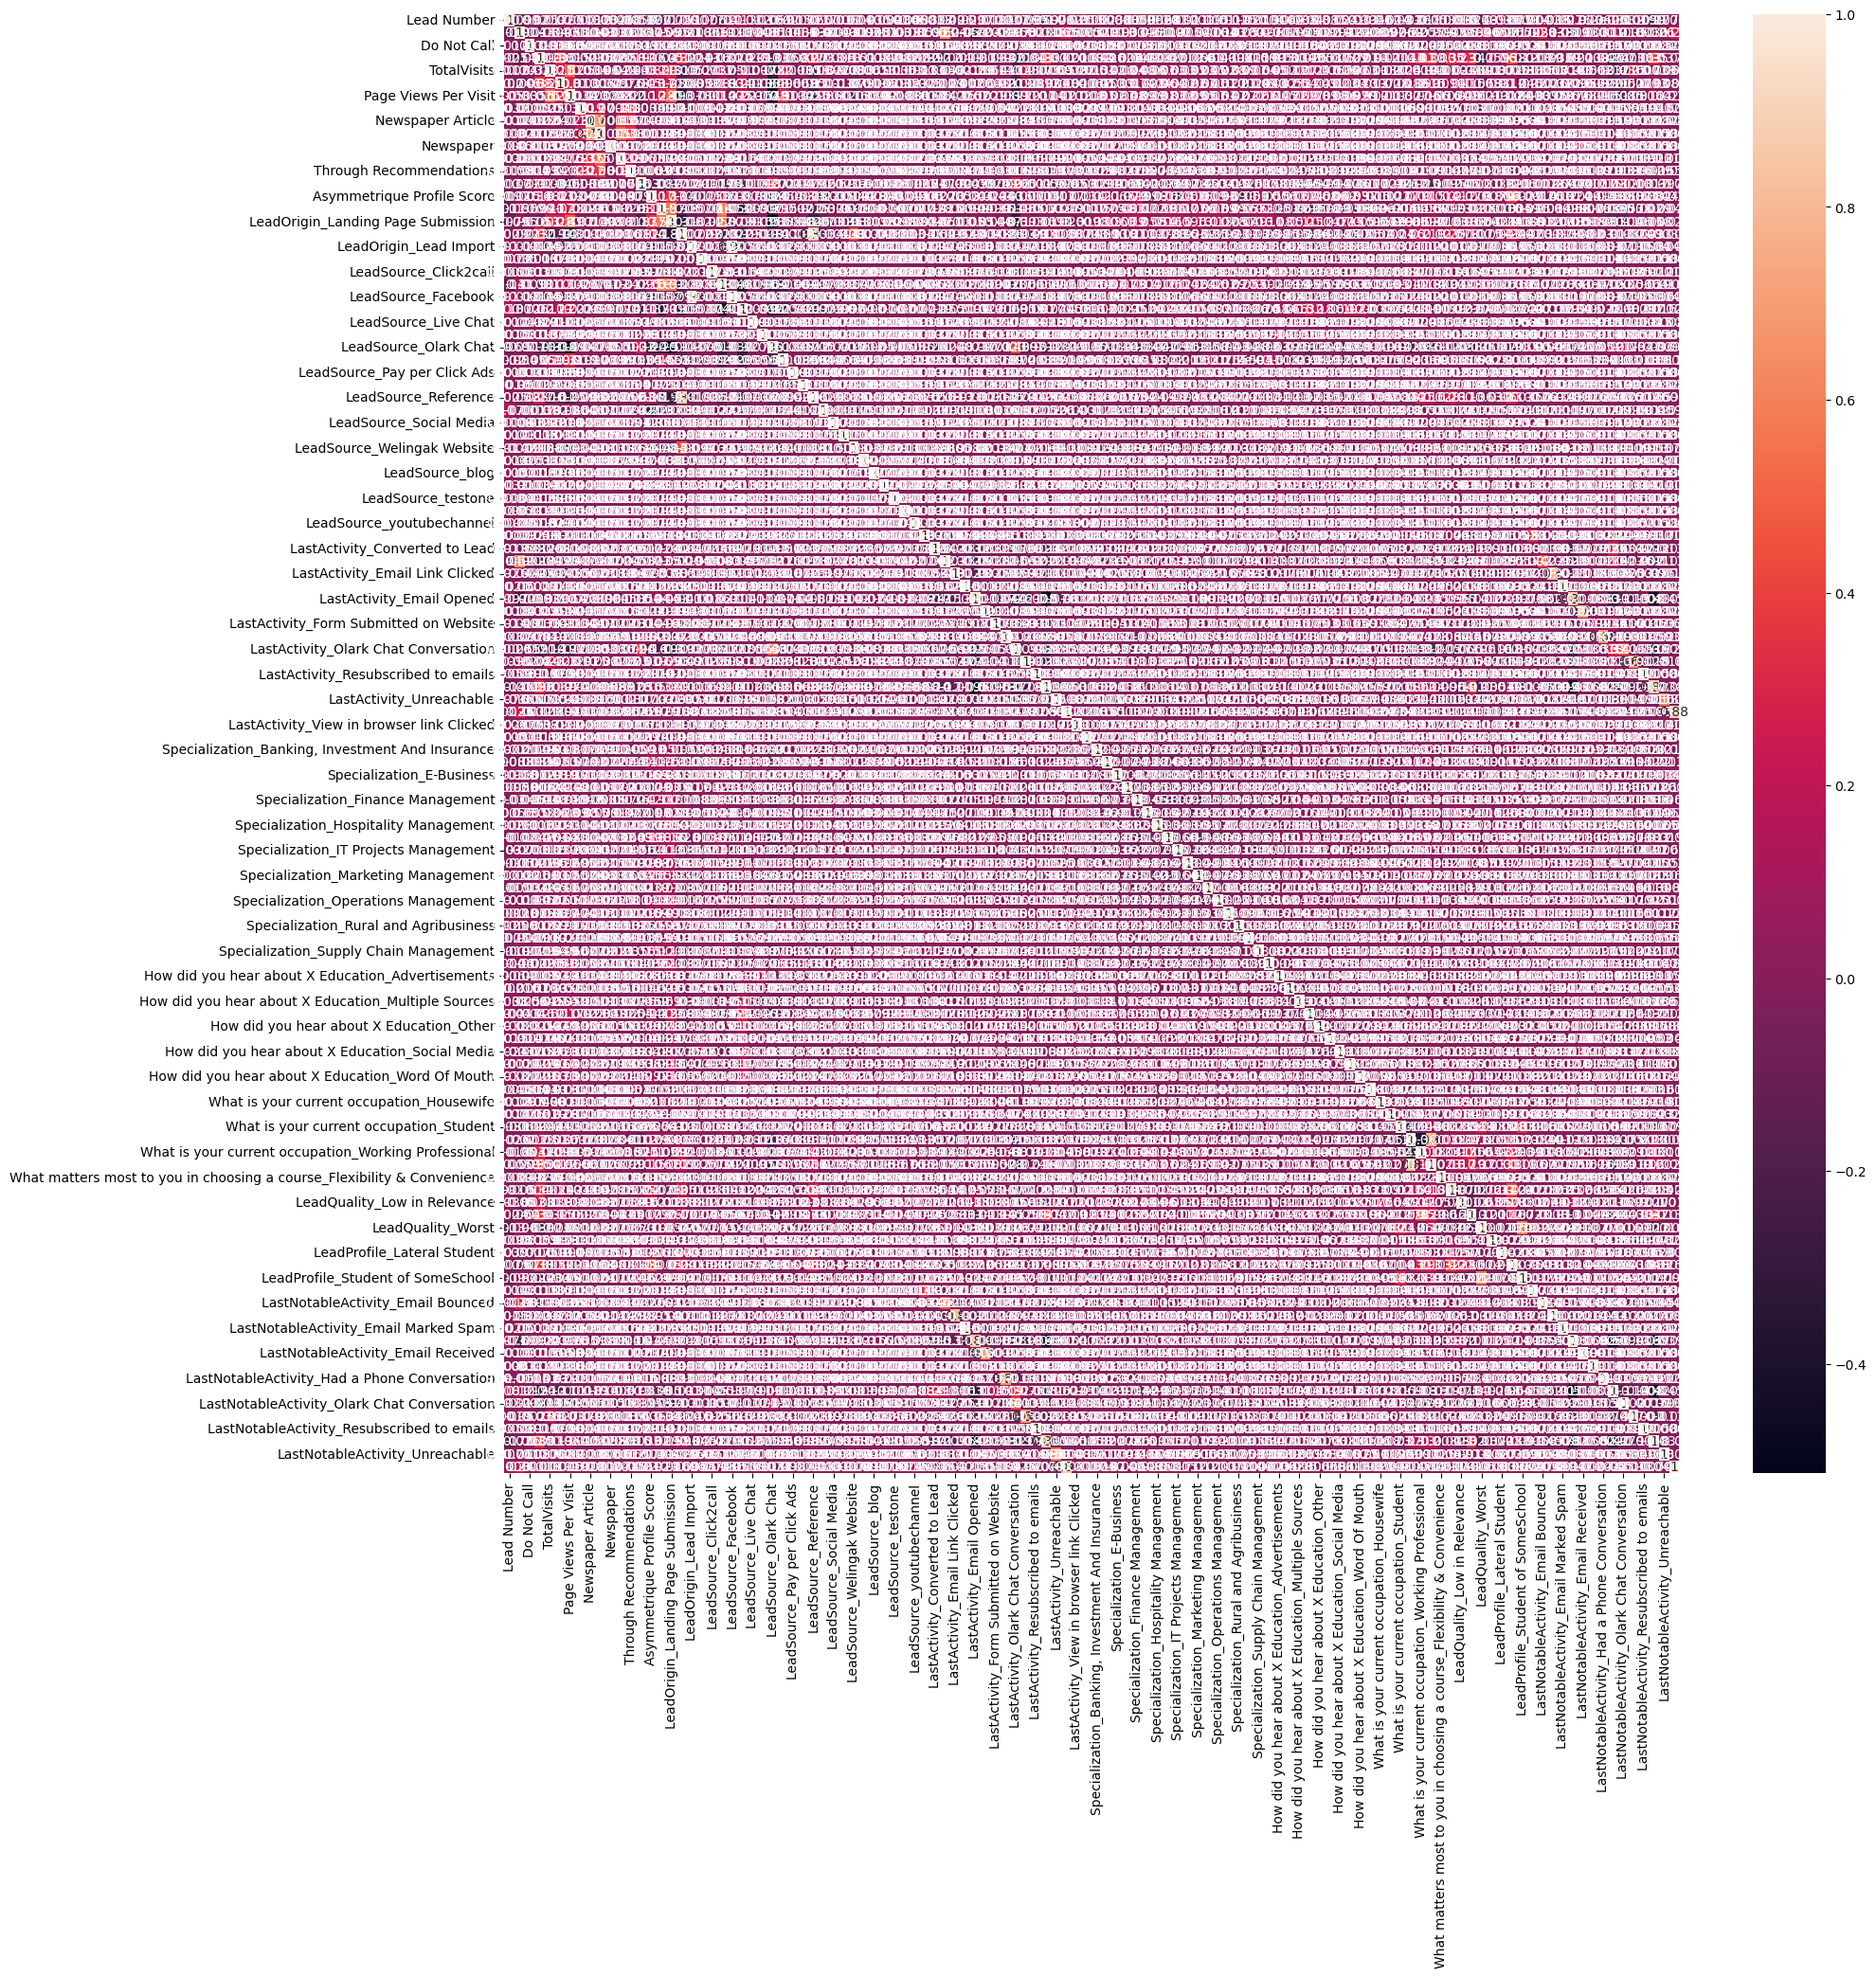

In [60]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_lead4.corr(),annot = True)
plt.show()

## Dropping high correlated dummy variables.
### But we are not able to see the correlation values due to large amount of variables

In [61]:
df_lead4.columns

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums',
       ...
       'LastNotableActivity_Email Received',
       'LastNotableActivity_Form Submitted on Website',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable',
       'LastNotableActivity_Unsubscribed'],
      dtype='object', length=116)

# Model Building.

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                          109
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Dec 2023   Deviance:                   1.3466e+05
Time:                        11:58:00   Pearson chi2:                 6.58e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -2.939e+15   4.15e+07  -7.09e+07      0.000   -2.94e+15   -2.94e+15
Do Not Email                                                            -2.176e+14   4.48e+06  -4.86e+07      0.000   -2.18e+14   -2.18e+14
Do Not Call                                                              3.323e+15   4.79e+07   6.94e+07      0.000    3.32e+15    3.32e+15
TotalVisits                                                              6.778e+12    1.9e+05   3.57e+07      0.000    6.78e+12    6.78e+12
Total Time Spent on Website                                              6.123e+14   9.95e+05   6.15e+08      0.000    6.12e+14    6.12e+14
Page Views Per Visit                                                    -1.084e+14   1.22e+06  -8.88e+07      0.000   -1.08e+14   -1.08e+14
Search                                                                  -2.841e+14   2.21e+07  -1.28e+07      0.000   -2.84e+14   -2.84e+14
Newspaper Article                                                        3.421e+15   6.74e+07   5.07e+07      0.000    3.42e+15    3.42e+15
X Education Forums                                                      -3.353e+15   1.12e+08     -3e+07      0.000   -3.35e+15   -3.35e+15
Newspaper                                                               -5.806e+15   6.73e+07  -8.62e+07      0.000   -5.81e+15   -5.81e+15
Digital Advertisement                                                   -2.617e+15   4.77e+07  -5.49e+07      0.000   -2.62e+15   -2.62e+15
Through Recommendations                                                  -6.28e+14   2.86e+07  -2.19e+07      0.000   -6.28e+14   -6.28e+14
Asymmetrique Activity Score                                               3.31e+14   8.96e+05   3.69e+08      0.000    3.31e+14    3.31e+14
Asymmetrique Profile Score                                              -4.111e+10   9.05e+05  -4.54e+04      0.000   -4.11e+10   -4.11e+10
A free copy of Mastering The Interview                                   8.249e+13   3.29e+06   2.51e+07      0.000    8.25e+13    8.25e+13
LeadOrigin_Landing Page Submission                                      -4.029e+14   4.17e+06  -9.66e+07      0.000   -4.03e+14   -4.03e+14
LeadOrigin_Lead Add Form                                                -5.107e+14   3.65e+07   -1.4e+07      0.000   -5.11e+14   -5.11e+14
LeadOrigin_Lead Import                                                  -1.207e+15   5.19e+07  -2.33e+07      0.000   -1.21e+15   -1.21e+15
LeadOrigin_Quick Add Form                                                2.173e+14   7.87e+07   2.76e+06      0.000    2.17e+14    2.17e+14
Lea

## Feature Selection using RFE.

In [65]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15, step=20)
           # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
#Support variable
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False])

In [67]:
#Reviewing the ranking of variables from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 5),
 ('Newspaper Article', False, 5),
 ('X Education Forums', False, 6),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 5),
 ('Asymmetrique Activity Score', False, 3),
 ('Asymmetrique Profile Score', False, 3),
 ('A free copy of Mastering The Interview', False, 6),
 ('LeadOrigin_Landing Page Submission', False, 3),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 2),
 ('LeadOrigin_Quick Add Form', False, 6),
 ('LeadSource_Click2call', False, 4),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_Live Chat', False, 5),
 ('LeadSource_NC_EDM', False, 5),
 ('LeadSource_Olark Chat', False, 5),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Pay per Click 

In [68]:
#Columns to consider for further analysis
col = X_train.columns[rfe.support_]

In [69]:
#Map train columns
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadOrigin_Quick Add Form', 'LeadSource_Click2call',
       'LeadSource_Live Chat', 'LeadSource_NC_EDM', 'LeadSource_Olark Chat',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Reference', 'LeadSource_Social Media', 'LeadSource_WeLearn',
       'LeadSource_bing', 'LeadSource_blog', 'LeadSource_google',
       'LeadSource_testone', 'LeadSource_welearnblog_Home',
       'LeadSource_youtubechannel', 'LastActivity_Approached upfront',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastAct

#### Assesing the model with StatsModel.

In [70]:
#Add constraint and fit
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.0
Date:                Mon, 18 Dec 2023   Deviance:                       4732.1
Time:                        12:05:28   Pearson chi2:                 6.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4499
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2811      0.090     -3.123      0.002      -0.458      -0.105
Total Time Spent on Website                              1.0503      0.042     24.939      0.000       0.968       1.133
LeadOrigin_Lead Add Form                                 1.5606      0.215      7.270      0.000       1.140       1.981
LeadSource_Direct Traffic                               -1.3309      0.121    -11.035      0.000      -1.567      -1.095
LeadSource_Facebook                                     -1.2522      0.557     -2.250      0.024      -2.343      -0.161
LeadSource_Google                                       -0.9759      0.114     -8.549      0.000      -1.200      -0.752
LeadSource_Organic Search                               -1.1039      0.140     -7.898      0.000      -1.378      -0.830
LeadSource_Referral Sites                               -1.5697      0.337     -4.663      0.000      -2.229      -0.910
LeadSource_Welingak Website                              3.5939      0.747      4.810      0.000       2.130       5.058
What is your current occupation_Working Professional     1.7430      0.205      8.514      0.000       1.342       2.144
LeadQuality_High in Relevance                            3.6639      0.233     15.715      0.000       3.207       4.121
LeadQuality_Low in Relevance                             2.5598      0.162     15.807      0.000       2.242       2.877
LeadQuality_Might be                                     1.9182      0.097     19.720      0.000       1.728       2.109
LeadQuality_Worst                                       -2.2036      0.341     -6.459      0.000      -2.872      -1.535
LeadProfile_Dual Specialization Student                 21.4825   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
LastNotableActivity_Modified                            -1.1457      0.084    -13.660      0.000      -1.310      -0.981
========================================================================================================================
"""

In [71]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.229532
6795    0.167144
3516    0.267517
8105    0.890421
3934    0.086541
4844    0.982115
3297    0.104189
8071    0.994864
987     0.086263
7423    0.939059
dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22953163, 0.16714406, 0.2675174 , 0.89042057, 0.08654097,
       0.98211496, 0.10418871, 0.99486368, 0.08626296, 0.93905936])

### Creating a dataframe with the predicted probabilities and actual converted flags.

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

Converted  Lead_Score  Lead_Number
0          0    0.229532         1871
1          0    0.167144         6795
2          0    0.267517         3516
3          0    0.890421         8105
4          0    0.086541         3934

### Creating new column called 'Predicted' with 1 if Converted_Prob >= 0.8 or else 0.

In [74]:
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x >= 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Lead_Score  Lead_Number  Predicted
0          0    0.229532         1871          0
1          0    0.167144         6795          0
2          0    0.267517         3516          0
3          0    0.890421         8105          1
4          0    0.086541         3934          0

In [75]:
y_train_pred_final.head(10)

Converted  Lead_Score  Lead_Number  Predicted
0          0    0.229532         1871          0
1          0    0.167144         6795          0
2          0    0.267517         3516          0
3          0    0.890421         8105          1
4          0    0.086541         3934          0
5          1    0.982115         4844          1
6          0    0.104189         3297          0
7          1    0.994864         8071          1
8          0    0.086263          987          0
9          1    0.939059         7423          1

In [76]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3906   96]
 [1162 1304]]


In [77]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3906      96
# Converted            1162      1304

In [78]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8055040197897341


## Checking VIF
#### Variance Influence Factor (VIF), It is used to understand the correlation between feature variables.

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                            LeadOrigin_Lead Add Form  1.75
11                               LeadQuality_Might be  1.53
14                       LastNotableActivity_Modified  1.44
4                                   LeadSource_Google  1.40
8   What is your current occupation_Working Profes...  1.35
2                           LeadSource_Direct Traffic  1.31
9                       LeadQuality_High in Relevance  1.30
7                         LeadSource_Welingak Website  1.28
10                       LeadQuality_Low in Relevance  1.19
0                         Total Time Spent on Website  1.17
5                           LeadSource_Organic Search  1.13
12                                  LeadQuality_Worst  1.12
6                           LeadSource_Referral Sites  1.02
13            LeadProfile_Dual Specialization Student  1.02
3                                 LeadSource_Facebook  1.01

These variables having VIF with favaorable limit.But there variables having P-Value like 'What is your current occupation_Housewife','LeadProfile_Dual Specialization Student' So let's start by dropping that.

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2366.0
Date:                Mon, 18 Dec 2023   Deviance:                       4732.1
Time:                        12:17:46   Pearson chi2:                 6.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4499
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2811      0.090     -3.123      0.002      -0.458      -0.105
Total Time Spent on Website                              1.0503      0.042     24.939      0.000       0.968       1.133
LeadOrigin_Lead Add Form                                 1.5606      0.215      7.270      0.000       1.140       1.981
LeadSource_Direct Traffic                               -1.3309      0.121    -11.035      0.000      -1.567      -1.095
LeadSource_Facebook                                     -1.2522      0.557     -2.250      0.024      -2.343      -0.161
LeadSource_Google                                       -0.9759      0.114     -8.549      0.000      -1.200      -0.752
LeadSource_Organic Search                               -1.1039      0.140     -7.898      0.000      -1.378      -0.830
LeadSource_Referral Sites                               -1.5697      0.337     -4.663      0.000      -2.229      -0.910
LeadSource_Welingak Website                              3.5939      0.747      4.810      0.000       2.130       5.058
What is your current occupation_Working Professional     1.7430      0.205      8.514      0.000       1.342       2.144
LeadQuality_High in Relevance                            3.6639      0.233     15.715      0.000       3.207       4.121
LeadQuality_Low in Relevance                             2.5598      0.162     15.807      0.000       2.242       2.877
LeadQuality_Might be                                     1.9182      0.097     19.720      0.000       1.728       2.109
LeadQuality_Worst                                       -2.2036      0.341     -6.459      0.000      -2.872      -1.535
LeadProfile_Dual Specialization Student                 21.4825   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
LastNotableActivity_Modified                            -1.1457      0.084    -13.660      0.000      -1.310      -0.981
========================================================================================================================
"""

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.22953163, 0.16714406, 0.2675174 , 0.89042057, 0.08654097,
       0.98211496, 0.10418871, 0.99486368, 0.08626296, 0.93905936])

In [86]:
y_train_pred_final['Lead_Score'] = y_train_pred

In [87]:
# Creating new column 'Predicted' with 1 if Lead_Score > 0.8 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

Converted  Lead_Score  Lead_Number  Predicted
0          0    0.229532         1871          0
1          0    0.167144         6795          0
2          0    0.267517         3516          0
3          0    0.890421         8105          1
4          0    0.086541         3934          0

In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8055040197897341


Let's see the VIFs again

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                            LeadOrigin_Lead Add Form  1.75
11                               LeadQuality_Might be  1.53
14                       LastNotableActivity_Modified  1.44
4                                   LeadSource_Google  1.40
8   What is your current occupation_Working Profes...  1.35
2                           LeadSource_Direct Traffic  1.31
9                       LeadQuality_High in Relevance  1.30
7                         LeadSource_Welingak Website  1.28
10                       LeadQuality_Low in Relevance  1.19
0                         Total Time Spent on Website  1.17
5                           LeadSource_Organic Search  1.13
12                                  LeadQuality_Worst  1.12
6                           LeadSource_Referral Sites  1.02
13            LeadProfile_Dual Specialization Student  1.02
3                                 LeadSource_Facebook  1.01

In [90]:
## let drop the variable 'LeadProfile_Dual Specialization Student' with high P-value.
col = col.drop('LeadProfile_Dual Specialization Student', 1)
col

Index(['Total Time Spent on Website', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website',
       'What is your current occupation_Working Professional',
       'LeadQuality_High in Relevance', 'LeadQuality_Low in Relevance',
       'LeadQuality_Might be', 'LeadQuality_Worst',
       'LastNotableActivity_Modified'],
      dtype='object')

In [91]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2368.2
Date:                Mon, 18 Dec 2023   Deviance:                       4736.5
Time:                        12:20:59   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4496
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2786      0.090     -3.097      0.002      -0.455      -0.102
Total Time Spent on Website                              1.0504      0.042     24.936      0.000       0.968       1.133
LeadOrigin_Lead Add Form                                 1.5530      0.215      7.231      0.000       1.132       1.974
LeadSource_Direct Traffic                               -1.3331      0.121    -11.063      0.000      -1.569      -1.097
LeadSource_Facebook                                     -1.2590      0.557     -2.260      0.024      -2.351      -0.167
LeadSource_Google                                       -0.9800      0.114     -8.588      0.000      -1.204      -0.756
LeadSource_Organic Search                               -1.1056      0.140     -7.916      0.000      -1.379      -0.832
LeadSource_Referral Sites                               -1.5766      0.337     -4.680      0.000      -2.237      -0.916
LeadSource_Welingak Website                              3.5993      0.747      4.817      0.000       2.135       5.064
What is your current occupation_Working Professional     1.7483      0.204      8.550      0.000       1.348       2.149
LeadQuality_High in Relevance                            3.6777      0.233     15.800      0.000       3.221       4.134
LeadQuality_Low in Relevance                             2.5758      0.162     15.928      0.000       2.259       2.893
LeadQuality_Might be                                     1.9243      0.097     19.796      0.000       1.734       2.115
LeadQuality_Worst                                       -2.2041      0.341     -6.460      0.000      -2.873      -1.535
LastNotableActivity_Modified                            -1.1463      0.084    -13.669      0.000      -1.311      -0.982
========================================================================================================================
"""

In [92]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [93]:
y_train_pred[:10]

array([0.22995461, 0.16719225, 0.26798963, 0.89086428, 0.08668175,
       0.98232179, 0.10425298, 0.99493088, 0.08587192, 0.93932283])

In [94]:
y_train_pred_final['Lead_Score'] = y_train_pred

In [95]:
# Creating new column 'Predicted' with 1 if Lead_Score > 0.8 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

Converted  Lead_Score  Lead_Number  Predicted
0          0    0.229955         1871          0
1          0    0.167192         6795          0
2          0    0.267990         3516          0
3          0    0.890864         8105          1
4          0    0.086682         3934          0

In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8051948051948052


In [97]:
## Let us Run the VIF...

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                            LeadOrigin_Lead Add Form  1.74
11                               LeadQuality_Might be  1.53
13                       LastNotableActivity_Modified  1.44
4                                   LeadSource_Google  1.40
8   What is your current occupation_Working Profes...  1.35
2                           LeadSource_Direct Traffic  1.31
9                       LeadQuality_High in Relevance  1.29
7                         LeadSource_Welingak Website  1.28
10                       LeadQuality_Low in Relevance  1.19
0                         Total Time Spent on Website  1.17
5                           LeadSource_Organic Search  1.13
12                                  LeadQuality_Worst  1.12
6                           LeadSource_Referral Sites  1.02
3                                 LeadSource_Facebook  1.01

Setting up Metrics for sensitivity and specificity

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5287915652879156

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.9760119940029985

In [101]:
# Calculate false postive rate - predicting Convert when lead does not have Converted.
print(FP/ float(TN+FP))

0.0239880059970015


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.9314285714285714


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7707182320441989


## Plotting the ROC Curve

1.ROC curve demonstrates the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). 

2.The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

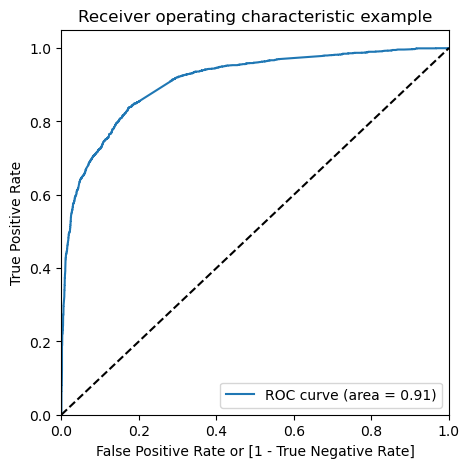

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that probablity where we get balanced sensitivity and specificity

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Lead_Score  Lead_Number  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0    0.229955         1871          0    1    1    1    0    0   
1          0    0.167192         6795          0    1    1    0    0    0   
2          0    0.267990         3516          0    1    1    1    0    0   
3          0    0.890864         8105          1    1    1    1    1    1   
4          0    0.086682         3934          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    0    0    0    0    0

In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.660328  0.964315  0.473013
0.2   0.2  0.783550  0.920519  0.699150
0.3   0.3  0.829777  0.829684  0.829835
0.4   0.4  0.833179  0.782238  0.864568
0.5   0.5  0.833333  0.727899  0.898301
0.6   0.6  0.834261  0.665856  0.938031
0.7   0.7  0.823748  0.600162  0.961519
0.8   0.8  0.805195  0.528386  0.975762
0.9   0.9  0.775201  0.428224  0.989005


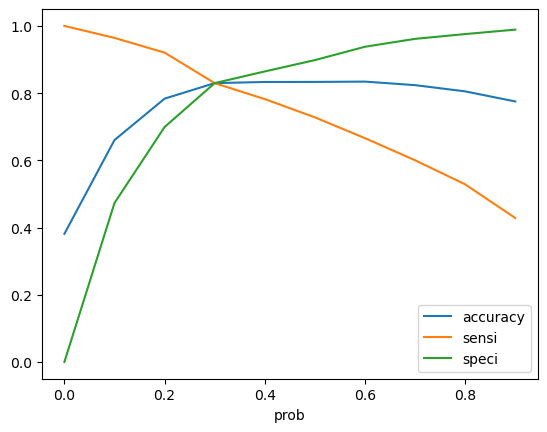

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.8 else 0)

y_train_pred_final.head(10)

Converted  Lead_Score  Lead_Number  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0    0.229955         1871          0    1    1    1    0    0   
1          0    0.167192         6795          0    1    1    0    0    0   
2          0    0.267990         3516          0    1    1    1    0    0   
3          0    0.890864         8105          1    1    1    1    1    1   
4          0    0.086682         3934          0    1    0    0    0    0   
5          1    0.982322         4844          1    1    1    1    1    1   
6          0    0.104253         3297          0    1    1    0    0    0   
7          1    0.994931         8071          1    1    1    1    1    1   
8          0    0.085872          987          0    1    0    0    0    0   
9          1    0.939323         7423          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    0    0    0    0    0                0  
5    1    1    1    1    1                1  
6    0    0    0    0    0                0  
7    1    1    1    1    1                1  
8    0    0    0    0    0                0  
9    1    1    1    1    1                1

In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8051948051948052

In [112]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3905,   97],
       [1163, 1303]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5283860502838605

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.9757621189405298

In [116]:
# Calculate false postive rate -  predicting Convert when lead does not have Converted.
print(FP/ float(TN+FP))

0.024237881059470265


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9307142857142857


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7705209155485399


 ## Calculation of Precision and Recall

In [119]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3905,   97],
       [1163, 1303]], dtype=int64)

Precision

TP / TP + FP

In [120]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9307142857142857

Recall

TP / TP + FN

In [121]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5283860502838605

In [122]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9307142857142857

In [123]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.5283860502838605

In [124]:
### Precision and recall tradeoff
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

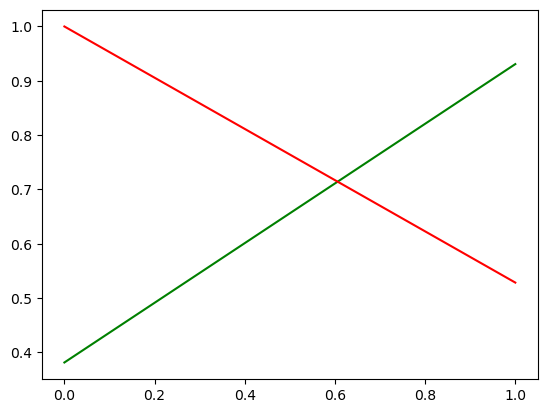

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Testing the model on Test Set

In [127]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [128]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  LeadOrigin_Lead Add Form  \
4269                     0.933036                         0   
2376                    -0.900812                         1   
7766                    -0.793792                         0   
9199                    -0.900812                         0   
4359                    -0.900812                         1   

      LeadSource_Direct Traffic  LeadSource_Facebook  LeadSource_Google  \
4269                          1                    0                  0   
2376                          0                    0                  0   
7766                          0                    0                  1   
9199                          0                    0                  0   
4359                          0                    0                  0   

      LeadSource_Organic Search  LeadSource_Referral Sites  \
4269                          0                          0   
2376                          0                          0   
7766                          0                          0   
9199                          0                          0   
4359                          0                          0   

      LeadSource_Welingak Website  \
4269                            0   
2376                            0   
7766                            0   
9199                            0   
4359                            0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      LeadQuality_High in Relevance  LeadQuality_Low in Relevance  \
4269                              0                             0   
2376                              0                             1   
7766                              0                             0   
9199                              0                             0   
4359                              0                             1   

      LeadQuality_Might be  LeadQuality_Worst  LastNotableActivity_Modified  
4269                     0                  0                             0  
2376                     0                  0                             0  
7766                     1                  0                             0  
9199                     0                  0                             1  
4359                     0                  0                             0

In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

4269    0.347139
2376    0.948044
7766    0.829222
9199    0.085406
4359    0.948044
9186    0.933324
1631    0.908959
8963    0.557261
8007    0.063229
5324    0.855417
dtype: float64

In [132]:
# Converting y_pred to a dataframe.
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
y_pred_1.head()

0
4269  0.347139
2376  0.948044
7766  0.829222
9199  0.085406
4359  0.948044

In [135]:
 #Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [136]:
# Putting Lead_Number to index
y_test_df['Lead_Number'] = y_test_df.index

In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [139]:
y_pred_final.head()

Converted  Lead_Number         0
0          1         4269  0.347139
1          1         2376  0.948044
2          1         7766  0.829222
3          0         9199  0.085406
4          1         4359  0.948044

In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score'})

In [144]:
# Rearranging the columns
cols = ['Lead_Number', 'Converted', 'Lead_Score']
y_pred_final = y_pred_final.reindex(columns=cols)


In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

Lead_Number  Converted  Lead_Score
0         4269          1    0.347139
1         2376          1    0.948044
2         7766          1    0.829222
3         9199          0    0.085406
4         4359          1    0.948044

In [146]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 0.8 else 0)

In [147]:
y_pred_final.head()

Lead_Number  Converted  Lead_Score  final_predicted
0         4269          1    0.347139                0
1         2376          1    0.948044                1
2         7766          1    0.829222                1
3         9199          0    0.085406                0
4         4359          1    0.948044                1

In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7943722943722944

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1642,   35],
       [ 535,  560]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5114155251141552

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.979129397734049